# BOSTON HOUSING PRICE ANALYSIS AND MODELING

**Dự án:** Phân tích và Mô hình hóa Dữ liệu Giá Nhà tại Boston  
**Môn học:** MAT3508 – Nhập môn Trí tuệ Nhân tạo
**Trường:** Đại học Khoa học Tự nhiên - ĐHQGHN  

---

## Mô tả

Dự án này thực hiện phân tích toàn diện bộ dữ liệu **Boston Housing**, bao gồm các bài toán:

- **Hồi quy:** Dự đoán giá nhà (MEDV)  
- **Phân cụm:** Khám phá cấu trúc ẩn trong dữ liệu  
- **Phân loại:** Phân loại nhà theo nhóm giá  

---

**Tác giả:** *Lương Quý Huy*  
**Ngày tạo:** 2025


# 1. Thiết lập và làm sạch dữ liệu
## Mục tiêu

- Tải dữ liệu từ file CSV  
- Xử lý giá trị thiếu (missing values)  
- Chuẩn bị dữ liệu sạch cho các tác vụ phân tích  

---

## Lưu ý

- Code hỗ trợ cả **Google Colab** và **Local Machine**  
- Giá trị thiếu được thay thế bằng **trung vị (median)** để giảm ảnh hưởng của *outliers*


### 1.1. Tải dữ liệu

In [2]:
import pandas as pd
import os

# --- TỰ ĐỘNG CẤU HÌNH ĐƯỜNG DẪN DỮ LIỆU ---


"""
Tự động phát hiện môi trường chạy (Colab/Local) và tải dữ liệu phù hợp.
"""

# 1. Thử chạy trên Google Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    # Đường dẫn trên Drive (Bạn hãy sửa đường dẫn này cho đúng với Drive của bạn)
    file_path = '/content/drive/MyDrive/HousingData.csv'
    print("Đang chạy trên Google Colab. Đã mount Drive.")

# 2. Nếu lỗi (không phải Colab), chạy như Local Machine
except ImportError:
    # Đường dẫn tương đối (cùng thư mục)
    file_path = 'HousingData.csv'
    print("Đang chạy trên Local Machine. Sử dụng file trong thư mục hiện tại.")

# --- TẢI DỮ LIỆU ---
try:
    df = pd.read_csv(file_path)
    print(f"Tải dữ liệu thành công từ: {file_path}")
    print(f"Kích thước dữ liệu: {df.shape}")
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file tại '{file_path}'.")
    print("Vui lòng kiểm tra lại vị trí file HousingData.csv")

Mounted at /content/drive
Đang chạy trên Google Colab. Đã mount Drive.
Tải dữ liệu thành công từ: /content/drive/MyDrive/MachineLearning/HousingData.csv
Kích thước dữ liệu: (506, 14)


#### Nhập các thư viện cần thiết:

In [3]:
# Xử lý số học & mảng
import numpy as np

# Trực quan hoá
import matplotlib.pyplot as plt
import seaborn as sns

# Tiền xử lý, chọn mẫu và chuyển đổi cột
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Giảm chiều
from sklearn.decomposition import PCA

# Hồi quy
from sklearn.linear_model import LinearRegression

# Phân cụm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

# Phân loại
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Các chỉ số đánh giá chung (regression & classification)
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report
)

# Hỗ trợ dựng pipeline
from sklearn.pipeline import Pipeline


### 1.2. Làm sạch dữ liệu (Xử lý NaN)
#### Chiến lược xử lý giá trị thiếu

- Sử dụng **trung vị (median)** thay vì trung bình (mean)  
- **Lý do:** Trung vị ít bị ảnh hưởng bởi *outliers* hơn  
- **Các cột có thể có missing:** `CRIM`, `ZN`, `INDUS`, `CHAS`, `AGE`, `LSTAT`

In [4]:
# --- BƯỚC 1: LÀM SẠCH DỮ LIỆU ---
print("Số lượng giá trị thiếu TRƯỚC khi xử lý:")
print(df.isnull().sum())

# Xử lý giá trị thiếu bằng cách điền trung vị
for col in df.columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nSố lượng giá trị thiếu SAU khi xử lý:")
print(df.isnull().sum())

print("\n5 dòng đầu tiên của dữ liệu đã làm sạch:")
df.head()

Số lượng giá trị thiếu TRƯỚC khi xử lý:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Số lượng giá trị thiếu SAU khi xử lý:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

5 dòng đầu tiên của dữ liệu đã làm sạch:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#2. Phân tích dữ liệu khám phá (EDA)
## Mục tiêu

- Hiểu phân phối của từng đặc trưng  
- Phát hiện mối tương quan giữa các biến  
- Nhận diện *outliers* và các *patterns* trong dữ liệu  

---

## Các biểu đồ được tạo

1. **Histogram + KDE:** Phân phối từng đặc trưng  
2. **Heatmap:** Ma trận tương quan


### 2.1 Trực quan hóa phân phối của từng đặc trưng

Phân phối của các đặc trưng:


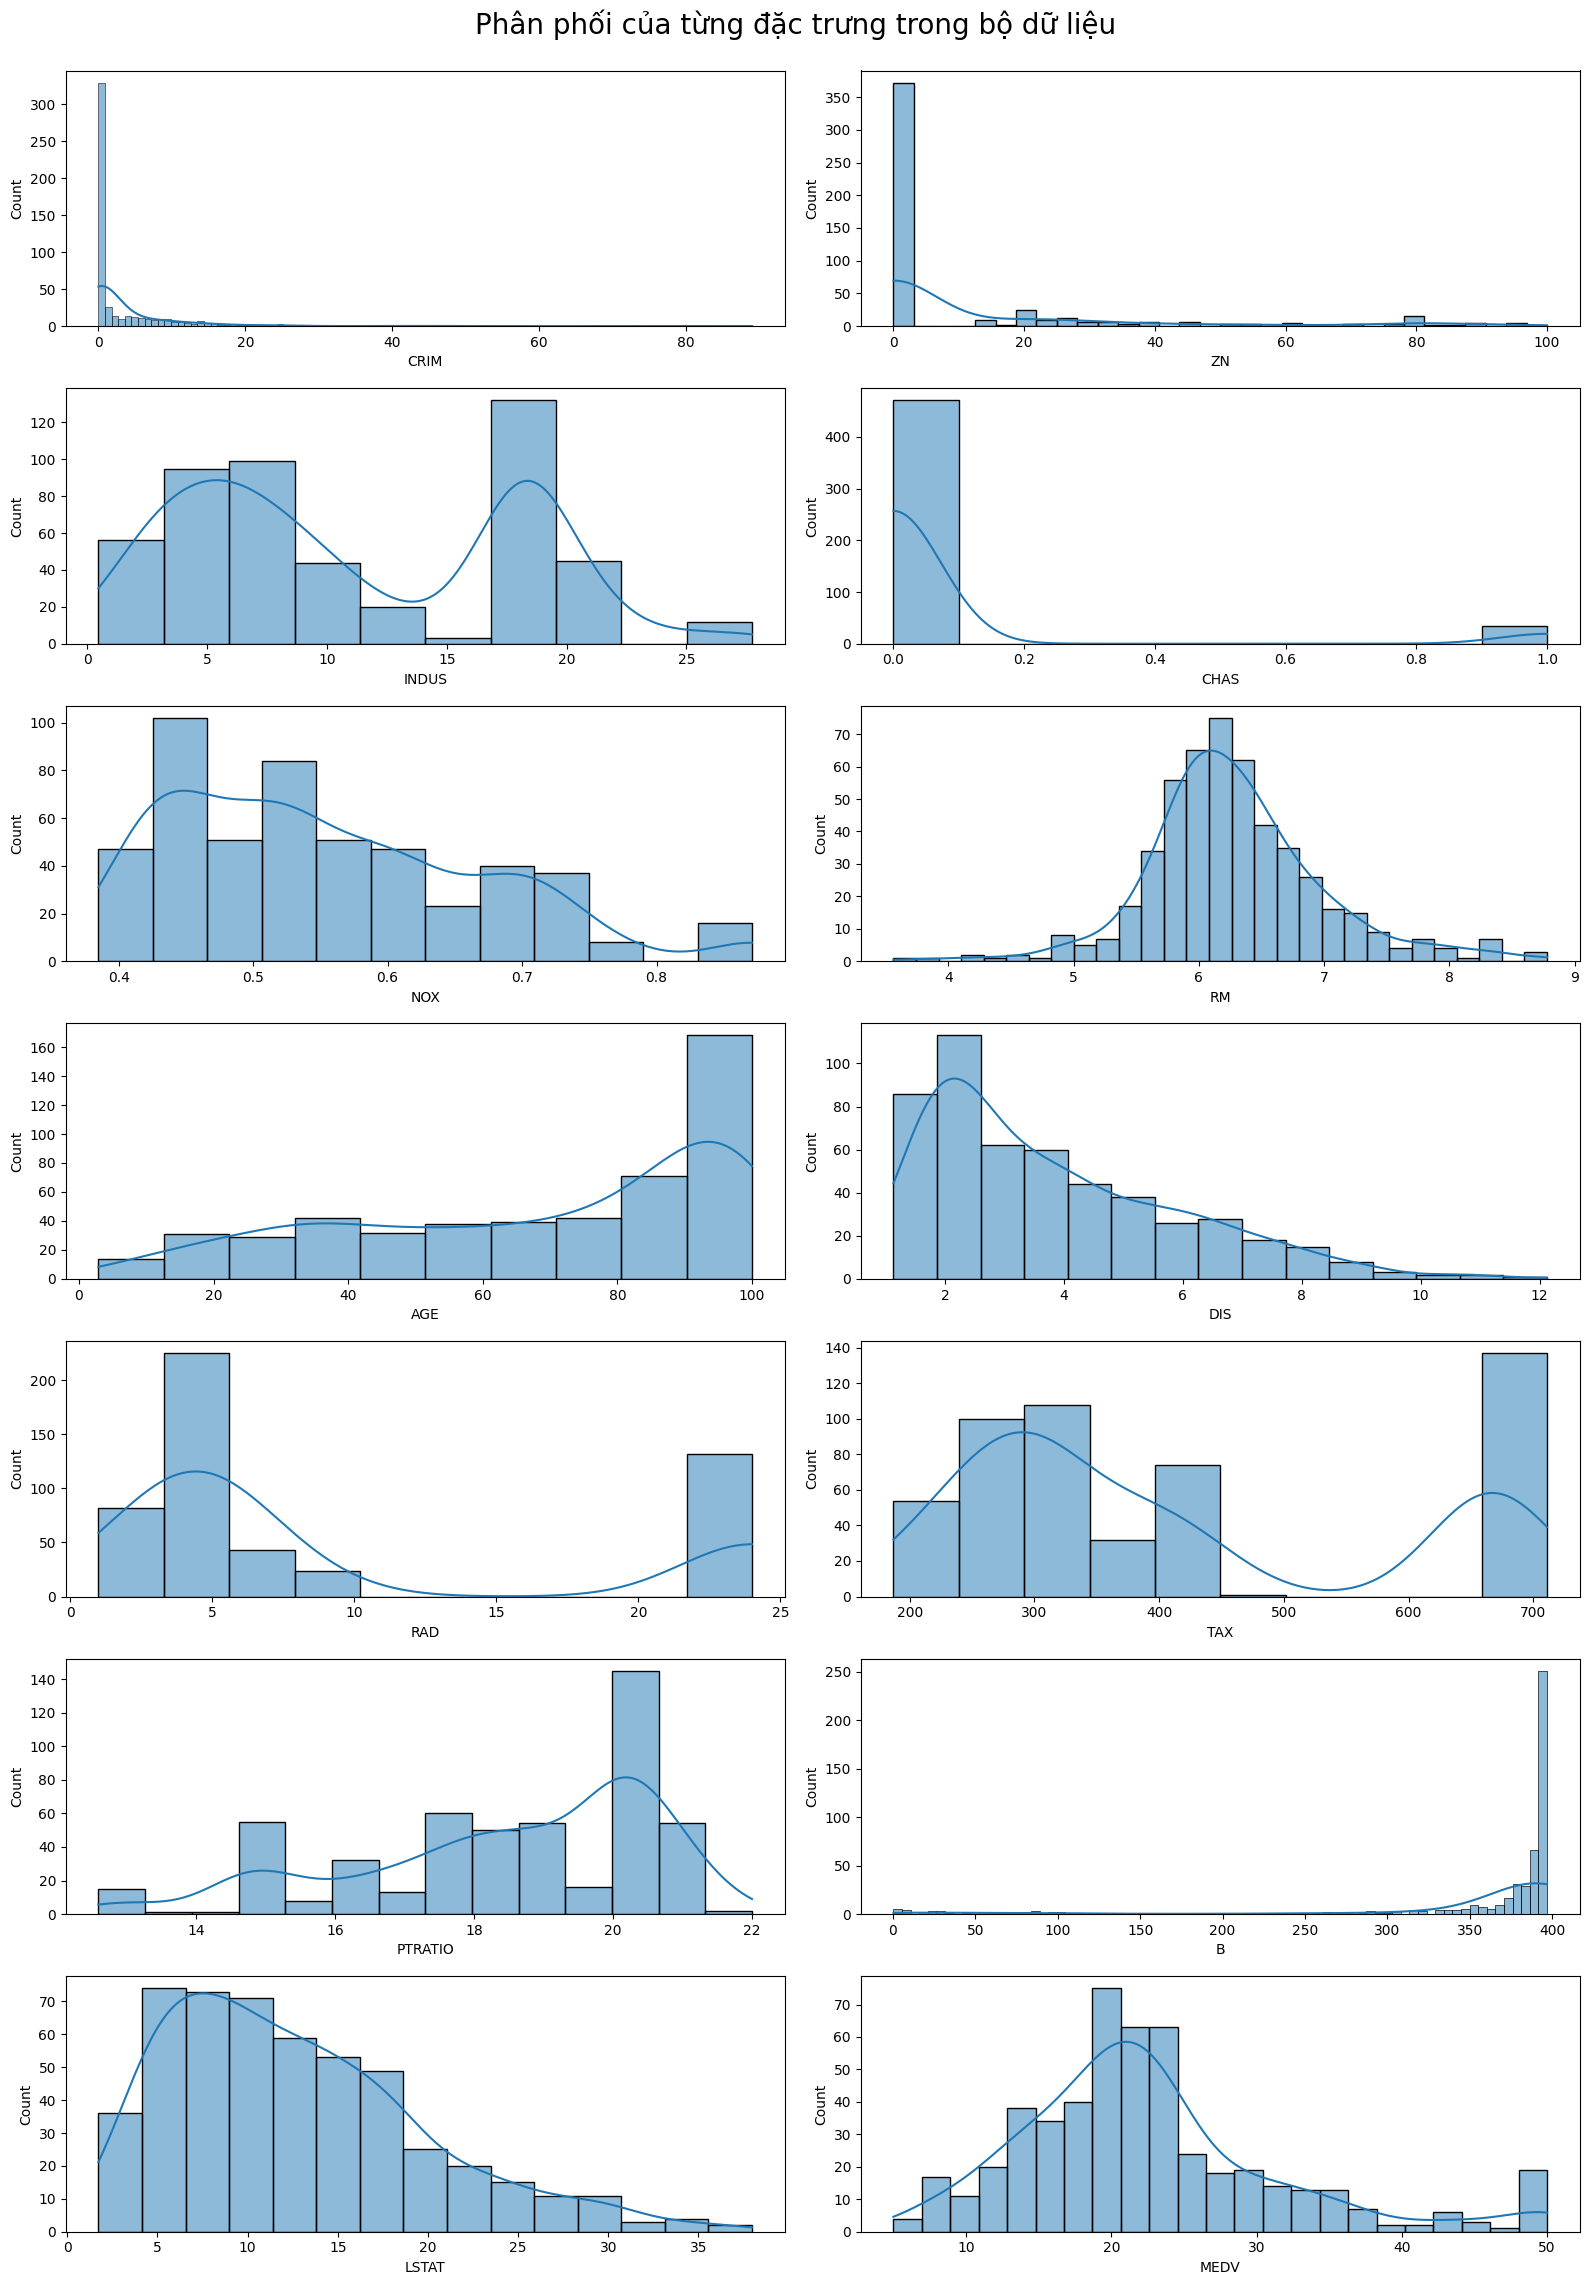

In [5]:
"""
Mục đích:
    - Xác định dạng phân phối (normal, skewed, bimodal...)
    - Phát hiện outliers
    - Hiểu range của từng đặc trưng
"""

print("Phân phối của các đặc trưng:")
pos = 1
fig = plt.figure(figsize=(16, 24))
fig.suptitle("Phân phối của từng đặc trưng trong bộ dữ liệu", fontsize=20)
for i in df.columns:
    ax = fig.add_subplot(7, 2, pos)
    pos += 1
    sns.histplot(df[i], ax=ax, kde=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### 2.2 Ma trận tương quan


Ma trận tương quan giữa các đặc trưng:


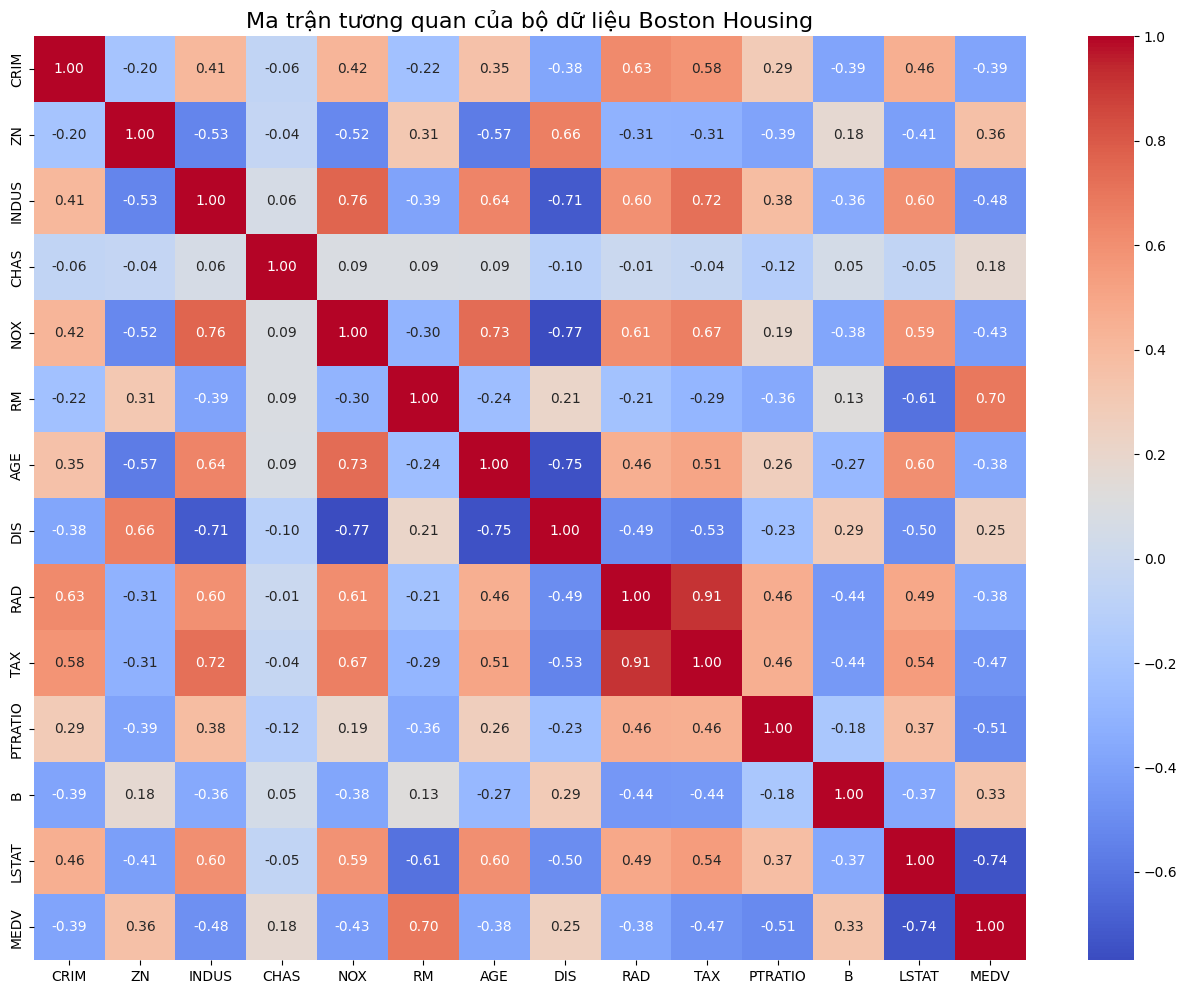

In [6]:
"""
Mục đích:
    - Xác định mối quan hệ tuyến tính giữa các biến
    - Phát hiện multicollinearity (đa cộng tuyến)
    - Tìm các đặc trưng quan trọng liên quan đến MEDV

Giải thích giá trị tương quan:
    - |r| > 0.7: Tương quan mạnh
    - 0.4 < |r| < 0.7: Tương quan trung bình
    - |r| < 0.4: Tương quan yếu
"""


print("\nMa trận tương quan giữa các đặc trưng:")
fig = plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan của bộ dữ liệu Boston Housing', fontsize=16)
plt.show()

# 3. Xây dựng các mô hình
Mục tiêu

- Xây dựng mô hình dự đoán giá nhà (MEDV) từ các đặc trưng  
- Áp dụng các kỹ thuật: **Chuẩn hóa**, **PCA**, **Linear Regression**

---

Quy trình

1. Tách biến độc lập (**X**) và biến phụ thuộc (**y**)  
2. Chia dữ liệu thành **train/test (80/20)**  
3. Chuẩn hóa các biến liên tục (**trừ CHAS**)  
4. Giảm chiều bằng **PCA** (giữ **95% phương sai**)  
5. Huấn luyện mô hình **Linear Regression**  
6. Đánh giá bằng **R²** và **RMSE**

---

Lưu ý quan trọng

- **CHAS** là biến nhị phân (0/1) → *không nên chuẩn hóa hoặc áp dụng PCA*  

## PHẦN A: BÀI TOÁN HỒI QUY (DỰ ĐOÁN GIÁ NHÀ)


### A.1. Tiền xử lý và xây dựng Pipeline Hồi quy
Quy trình:
- Tách biến X và y.
- Chia train/test theo tỉ lệ train: 80% và test: 20%.
---

In [7]:
# Tách biến MEDV vì đây là biến cần được dự đoán
X_reg = df.drop('MEDV', axis=1)
y_reg = df['MEDV']

# Chia dữ liệu tập dữ liệu theo tỉ lệ train: 80% và test: 20%
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Reset index để đảm bảo alignment
y_reg_train = y_reg_train.reset_index(drop=True)
y_reg_test = y_reg_test.reset_index(drop=True)

---
- Chuẩn hóa dữ liệu (Standard Scaler) và giảm chiều (PCA)
- `*Lưu ý: bỏ đi biến CHAS vì là 1 biến rời rạc, ta không nên áp dụng PCA và chuẩn hóa cho biến này*`
---

In [8]:
# Xác định cột biến liên tục (không gồm 'CHAS')
continuous_cols = [c for c in X_reg.columns if c != 'CHAS']

# Khởi tạo Scaler
scaler = StandardScaler()

# Fit và transform trên tập train
X_reg_train_scaled = scaler.fit_transform(X_reg_train[continuous_cols])

# Chỉ transform trên tập test
X_reg_test_scaled = scaler.transform(X_reg_test[continuous_cols])

# Biểu diễn kết quả: Chuyển đổi lại thành DataFrame để xem
df_train_scaled = pd.DataFrame(X_reg_train_scaled, columns=continuous_cols)

print("--- Dữ liệu sau khi chuẩn hóa (5 dòng đầu) ---")
print(df_train_scaled.head())

print("\n--- Kiểm tra thống kê của dữ liệu huấn luyện đã chuẩn hóa ---")
# mean nên xấp xỉ 0 và std nên xấp xỉ 1
print(df_train_scaled.describe().loc[['mean', 'std']])

--- Dữ liệu sau khi chuẩn hóa (5 dòng đầu) ---
       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0  1.287702 -0.500320  1.033237  0.489252 -1.428069  1.028015 -0.802173   
1 -0.336384 -0.500320 -0.413160 -0.157233 -0.680087 -0.431199  0.324349   
2 -0.403253  1.013271 -0.715218 -1.008723 -0.402063 -1.618599  1.330697   
3  0.388230 -0.500320  1.033237  0.489252 -0.300450  0.591681 -0.839240   
4 -0.325282 -0.500320 -0.413160 -0.157233 -0.831094  0.033747 -0.005494   

        RAD       TAX   PTRATIO         B     LSTAT  
0  1.706891  1.578434  0.845343 -0.074337  1.753505  
1 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.624360 -0.584648  1.204741  0.379119 -0.165787  

--- Kiểm tra thống kê của dữ liệu huấn luyện đã chuẩn hóa ---
              CRIM       ZN         INDUS           NOX            RM  \
mean -2.638154e-17  0.00000 -4.177077e-17 

In [9]:
# Khởi tạo PCA để giữ lại 95% phương sai
pca = PCA(n_components=0.95)

# Fit và transform trên tập train đã chuẩn hóa
X_reg_train_pca = pca.fit_transform(X_reg_train_scaled)

# Chỉ transform trên tập test đã chuẩn hóa
X_reg_test_pca = pca.transform(X_reg_test_scaled)

# --- Biểu diễn kết quả của PCA ---
print("--- Kết quả sau khi áp dụng PCA ---")
print(f"Số chiều ban đầu: {X_reg_train_scaled.shape[1]}")
print(f"Số chiều sau khi giảm: {pca.n_components_}")
print(f"Tổng phương sai được giữ lại: {pca.explained_variance_ratio_.sum():.4f}")

# Tạo DataFrame để dễ hình dung dữ liệu sau PCA
pca_columns = [f'PC_{i+1}' for i in range(pca.n_components_)]
df_train_pca = pd.DataFrame(X_reg_train_pca, columns=pca_columns)
print("\n--- Dữ liệu sau PCA (5 dòng đầu) ---")
print(df_train_pca.head())

--- Kết quả sau khi áp dụng PCA ---
Số chiều ban đầu: 12
Số chiều sau khi giảm: 9
Tổng phương sai được giữ lại: 0.9656

--- Dữ liệu sau PCA (5 dòng đầu) ---
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  3.628317  0.832951 -0.960494 -0.189101  0.838273  0.196201  0.254690   
1 -0.681347 -0.246250 -1.340757  0.922840 -0.396013  0.099963 -0.332335   
2 -2.681373  0.808173 -0.648425 -0.793068 -0.180288 -0.130046 -0.634740   
3  3.770789  1.714661  0.655514 -0.805538 -2.662693 -0.545876  0.338080   
4 -0.266020 -0.506199 -1.432018  0.741350 -0.400302  0.247874  0.035561   

       PC_8      PC_9  
0 -0.387439 -0.030326  
1  0.270721 -0.381025  
2  0.164020  0.076402  
3 -0.358952  0.195311  
4  0.222490 -0.464974  


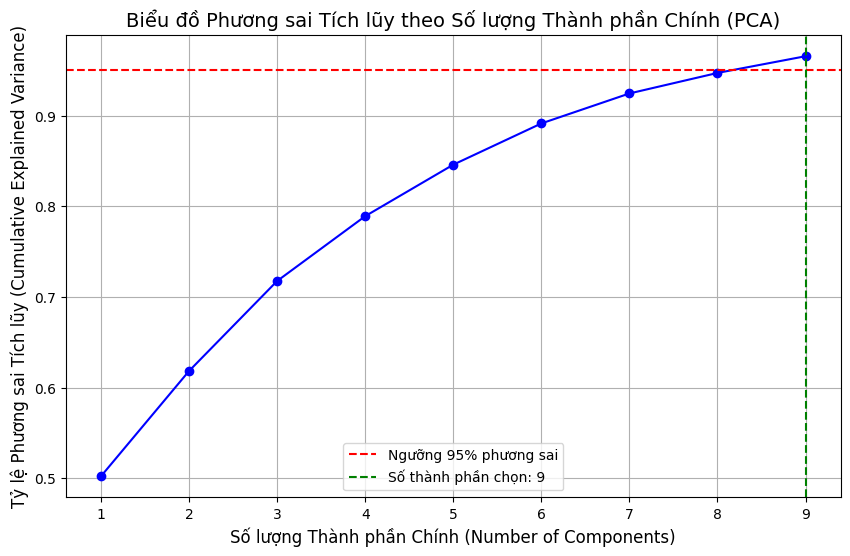

--> Số lượng thành phần chính cần thiết để giữ lại 95% phương sai là: 9


In [10]:

# 2. Tính phương sai tích lũy (Cumulative Sum)
# explained_variance_ratio_ trả về % phương sai của từng PC riêng lẻ
# np.cumsum sẽ cộng dồn chúng lại (PC1, PC1+PC2, PC1+PC2+PC3...)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 3. Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ đường biểu diễn chính
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')

# Vẽ đường ngưỡng 95% (hoặc 90%) để tham chiếu
plt.axhline(y=0.95, color='r', linestyle='--', label='Ngưỡng 95% phương sai')

# Trang trí biểu đồ
plt.title('Biểu đồ Phương sai Tích lũy theo Số lượng Thành phần Chính (PCA)', fontsize=14)
plt.xlabel('Số lượng Thành phần Chính (Number of Components)', fontsize=12)
plt.ylabel('Tỷ lệ Phương sai Tích lũy (Cumulative Explained Variance)', fontsize=12)
plt.grid(True)
plt.legend(loc='lower right')

# Tìm số lượng thành phần tối thiểu để đạt 95% (để in ra màn hình)
k_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(x=k_95, color='g', linestyle='--', label=f'Số thành phần chọn: {k_95}')
plt.legend()

plt.show()

print(f"--> Số lượng thành phần chính cần thiết để giữ lại 95% phương sai là: {k_95}")

---
- Ghép lại CHAS vào bộ dữ liệu đã xử lý

In [11]:
#Lấy cột CHAS giữ nguyên từ train/test
X_train_chas = X_reg_train[['CHAS']].reset_index(drop=True)
X_test_chas  = X_reg_test[['CHAS']].reset_index(drop=True)

#Chuyển PCA result về DataFrame và ghép CHAS vào
pca_columns = [f'PC_{i+1}' for i in range(X_reg_train_pca.shape[1])]
df_X_train_final = pd.concat([
    pd.DataFrame(X_reg_train_pca, columns=pca_columns).reset_index(drop=True),
    X_train_chas
], axis=1)

df_X_test_final = pd.concat([
    pd.DataFrame(X_reg_test_pca, columns=pca_columns).reset_index(drop=True),
    X_test_chas
], axis=1)

# 7. Bây giờ dùng df_X_train_final và df_X_test_final để huấn luyện mô hình
print("Train shape:", df_X_train_final.shape)
print("Test shape: ", df_X_test_final.shape)

Train shape: (404, 10)
Test shape:  (102, 10)


In [12]:
# Khởi tạo mô hình
model_reg = LinearRegression()

# Huấn luyện mô hình trên dữ liệu đã qua PCA
model_reg.fit(df_X_train_final, y_reg_train)

print("Mô hình Hồi quy Tuyến tính đã được huấn luyện thành công trên dữ liệu đã xử lý.")

Mô hình Hồi quy Tuyến tính đã được huấn luyện thành công trên dữ liệu đã xử lý.


### A.2. Đánh giá mô hình Hồi quy

--- Kết quả đánh giá trên tập Test ---
R-Squared (R²): 0.6086
Root Mean Squared Error (RMSE): 5.3572(Đơn vị: nghìn $)


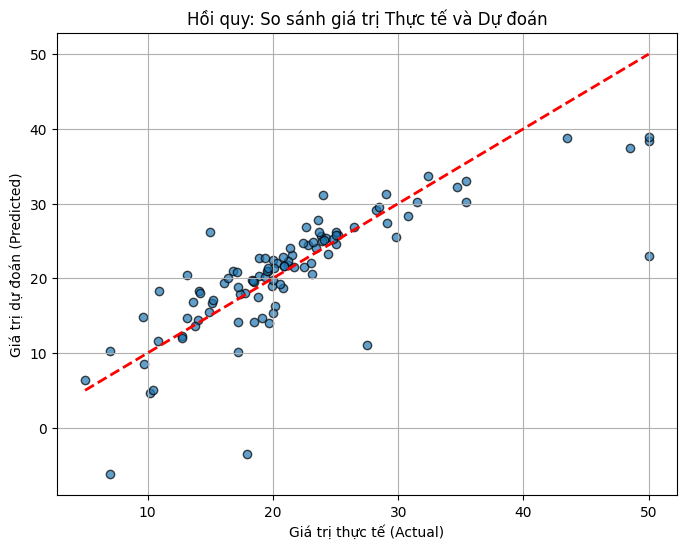

In [13]:
# Dự đoán trên tập test đã qua PCA
y_reg_pred = model_reg.predict(df_X_test_final)

# Tính toán các chỉ số đánh giá
r2 = r2_score(y_reg_test, y_reg_pred)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))

print(f"--- Kết quả đánh giá trên tập Test ---")
print(f"R-Squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}(Đơn vị: nghìn $)")

# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.7, edgecolors='k')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], '--r', linewidth=2)
plt.xlabel('Giá trị thực tế (Actual)')
plt.ylabel('Giá trị dự đoán (Predicted)')
plt.title('Hồi quy: So sánh giá trị Thực tế và Dự đoán')
plt.grid(True)
plt.show()

## PHẦN B: BÀI TOÁN PHÂN CỤM (KHÁM PHÁ CẤU TRÚC DỮ LIỆU)
Mục tiêu

- Khám phá cấu trúc ẩn trong dữ liệu (*unsupervised learning*)  
- Nhóm các căn nhà có đặc điểm tương tự  

---

Thuật toán sử dụng

- **K-Means Clustering**

---

Các chỉ số đánh giá

- **Silhouette Score:** Đo độ tách biệt giữa các cụm (−1 đến 1, cao hơn tốt hơn)  
- **Davies-Bouldin Index:** Đo độ tương tự giữa các cụm (thấp hơn tốt hơn)  
- **Calinski-Harabasz Index:** Tỷ lệ phân tán (cao hơn tốt hơn)

---

Lưu ý quan trọng

- **KHÔNG** bao gồm biến mục tiêu **MEDV** trong quá trình clustering  
- Cần **chuẩn hóa dữ liệu** trước khi phân cụm


### B.1. Chuẩn hóa dữ liệu và thực hiện phân cụm

In [14]:
# Chỉ lấy features, KHÔNG lấy MEDV
X_cluster = df.drop('MEDV', axis=1)

# Chuẩn hóa
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_cluster_scaled)

print("Phân cụm hoàn tất.")

Phân cụm hoàn tất.


### B.2. Đánh giá và trực quan hóa kết quả phân cụm
Lưu ý: Để trực quan hóa, chúng ta giảm chiều xuống 2D bằng PCA. Tuy nhiên, việc đánh giá nên được thực hiện trên không gian dữ liệu gốc nơi các cụm được hình thành.
#### Đánh giá trên dữ liệu đa chiều (df_scaled)

In [15]:

print("--- Đánh giá chất lượng phân cụm ---")
print("K-Means Silhouette Score:", silhouette_score(X_cluster_scaled, kmeans_labels))
print("\nK-Means Davies-Bouldin:", davies_bouldin_score(X_cluster_scaled, kmeans_labels))
print("\nK-Means Calinski-Harabasz:", calinski_harabasz_score(X_cluster_scaled, kmeans_labels))


--- Đánh giá chất lượng phân cụm ---
K-Means Silhouette Score: 0.2574894522739463

K-Means Davies-Bouldin: 1.3182267920613233

K-Means Calinski-Harabasz: 219.24081274926928


#### Trực quan hóa trên không gian 2D (PCA)

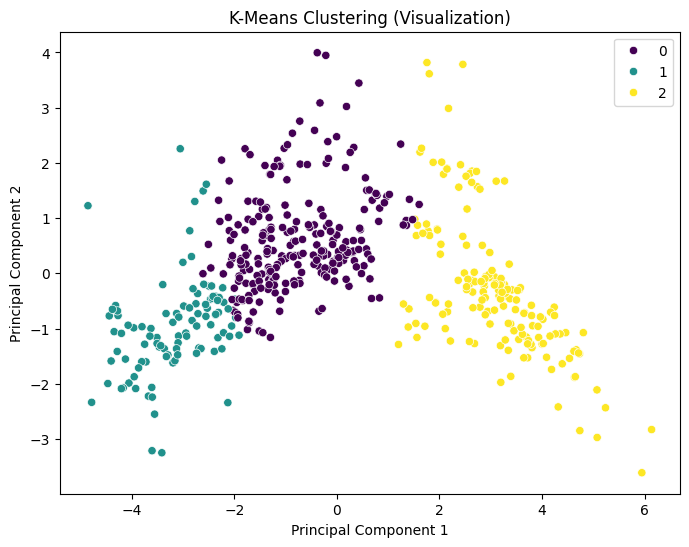

In [16]:
pca_vis = PCA(n_components=2)
df_pca_vis = pca_vis.fit_transform(X_cluster_scaled)

# Modify to create and display a single plot
plt.figure(figsize=(8, 6)) # Adjust figure size for a single plot
sns.scatterplot(x=df_pca_vis[:, 0], y=df_pca_vis[:, 1], hue=kmeans_labels, palette="viridis")
plt.title('K-Means Clustering (Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## PHẦN C: BÀI TOÁN PHÂN LOẠI (DỰ ĐOÁN NHÓM GIÁ)


### C.1. Chuẩn bị dữ liệu cho phân loại
**Mục tiêu**

- Phân loại nhà vào các nhóm giá (*Thấp*, *Trung bình*, *Cao*)  
- So sánh hiệu suất của nhiều thuật toán  

---

**Các mô hình sử dụng**

1. **K-Nearest Neighbors (KNN):** Dựa trên k láng giềng gần nhất  
2. **Support Vector Machine (SVM):** Tìm siêu phẳng phân tách tối ưu  

---

**Quy trình**

1. Rời rạc hóa **MEDV** thành các nhóm giá  
2. Chia **train/test** với *stratify* (giữ tỷ lệ lớp cân bằng)  
3. Xây dựng **pipeline** với preprocessing  
4. Huấn luyện và đánh giá từng mô hình


In [17]:
# Rời rạc hóa biến MEDV
bins = [0, 15, 25, 50]  # Ví dụ: Rẻ, Trung bình, Đắt
labels = ['Giá thấp', 'Giá trung bình', 'Giá cao']
df['MEDV_Group'] = pd.cut(df['MEDV'], bins=bins, labels=labels, include_lowest=True)

# Kiểm tra sự phân bổ của các lớp
print("Phân bổ các nhóm giá:\n", df['MEDV_Group'].value_counts())

# Tách biến X, y cho bài toán phân loại
X_cls = df.drop(['MEDV', 'MEDV_Group'], axis=1)
y_cls = df['MEDV_Group']

# Chia dữ liệu
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

Phân bổ các nhóm giá:
 MEDV_Group
Giá trung bình    285
Giá cao           124
Giá thấp           97
Name: count, dtype: int64


###C.2. Xây dựng và đánh giá các mô hình phân loại


In [18]:
# 1. Xác định cột continuous và cột CHAS (nếu có)
continuous_cols = [c for c in X_cls_train.columns if c != 'CHAS']
categorical_cols = ['CHAS'] if 'CHAS' in X_cls_train.columns else []

# 2. Tạo ColumnTransformer: scale cho continuous, passthrough cho CHAS
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', 'passthrough', categorical_cols)
    ],
    remainder='drop'  # bỏ các cột không được liệt kê (nếu có)
)

# 3. Pipeline cho KNN (scale được áp dụng qua preprocessor)
pipeline_knn = Pipeline([
    ('preproc', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Huấn luyện và dự đoán KNN
pipeline_knn.fit(X_cls_train, y_cls_train)
y_knn_pred = pipeline_knn.predict(X_cls_test)

print("\n--- K-Nearest Neighbors (KNN) ---")
print(f"Accuracy: {accuracy_score(y_cls_test, y_knn_pred):.4f}")
print(classification_report(y_cls_test, y_knn_pred))

# 4. Pipeline cho SVM (cũng dùng preprocessor để scale chỉ các continuous)
pipeline_svm = Pipeline([
    ('preproc', preprocessor),
    ('model', SVC(kernel='rbf', random_state=42))
])

# Huấn luyện và dự đoán SVM
pipeline_svm.fit(X_cls_train, y_cls_train)
y_svm_pred = pipeline_svm.predict(X_cls_test)

print("\n--- Support Vector Machine (SVM) ---")
print(f"Accuracy: {accuracy_score(y_cls_test, y_svm_pred):.4f}")
print(classification_report(y_cls_test, y_svm_pred))


--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.8235
                precision    recall  f1-score   support

       Giá cao       0.95      0.76      0.84        25
      Giá thấp       0.74      0.70      0.72        20
Giá trung bình       0.81      0.89      0.85        57

      accuracy                           0.82       102
     macro avg       0.83      0.78      0.80       102
  weighted avg       0.83      0.82      0.82       102


--- Support Vector Machine (SVM) ---
Accuracy: 0.8529
                precision    recall  f1-score   support

       Giá cao       1.00      0.72      0.84        25
      Giá thấp       0.83      0.75      0.79        20
Giá trung bình       0.82      0.95      0.88        57

      accuracy                           0.85       102
     macro avg       0.88      0.81      0.83       102
  weighted avg       0.87      0.85      0.85       102

